In [465]:
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.optimize import curve_fit

In [371]:
# generate random positive vector
vector = np.zeros(2000)
for n in range(2000):
    v = random.expovariate(0.58)
    vector[n] = v
vector.shape

(2000,)

In [372]:
vector[0:5]

array([3.16172187, 2.25199707, 2.10011307, 0.1750809 , 1.33751359])

In [373]:
#defying a Constant function
def constant_function(vector):
    # f = lambda x: 4
    # map_object = map(f, vector)
    # return np.array(list(map_object))
    return 6

In [374]:
#defying a Sum function
def sum_of_elements(vector):
    return np.sum(vector)

In [376]:
#defying a Product function
def product_of_elements(vector):
    return np.prod(vector)

In [378]:
#defying a poly function
def calc_polynomial(coefs, x=1.5):
    return np.polyval(coefs, x)

In [394]:
#defying a Horner function
def horner(coeff, x=1.5):

    # Initialize result
    result = coeff[0]

    n = len(coeff)
    # Evaluate value of polynomial
    # using Horner's method
    for i in range(1, n):

        result = result*x + coeff[i]

    return result

In [382]:
#defying a bubble sort function
def bubble_sort(arr):
    def swap(i, j):
        arr[i], arr[j] = arr[j], arr[i]

    n = len(arr)
    swapped = True

    x = -1
    while swapped:
        swapped = False
        x = x + 1
        for i in range(1, n-x):
            if arr[i - 1] > arr[i]:
                swap(i - 1, i)
                swapped = True

In [396]:
#defying a quick sort function
def partition(array, begin, end):
    pivot_idx = begin
    for i in range(begin+1, end+1):
        if array[i] <= array[begin]:
            pivot_idx += 1
            array[i], array[pivot_idx] = array[pivot_idx], array[i]
    array[pivot_idx], array[begin] = array[begin], array[pivot_idx]
    return pivot_idx

def quick_sort_recursion(array, begin, end):
    if begin >= end:
        return
    pivot_idx = partition(array, begin, end)
    quick_sort_recursion(array, begin, pivot_idx-1)
    quick_sort_recursion(array, pivot_idx+1, end)

def quick_sort(array, begin=0, end=None):
    if end is None:
        end = len(array) - 1

    return quick_sort_recursion(array, begin, end)

In [407]:
#defying a Matrix evaluating function
def matrix_evaluating(n):
    A = np.random.random((n, n))
    B = np.random.random((n, n))
    return np.dot(A, B)

In [461]:
#Start script of measuring time
times_arr = []
for times in tqdm(range(10)):
    for n in range(1, 1700, 10):
        start = time.perf_counter()
        constant_function(vector[:n])
        const_time = time.perf_counter() - start
        start = time.perf_counter()
        sum_of_elements(vector[:n])
        sum_time = time.perf_counter() - start
        start = time.perf_counter()
        product_of_elements(vector[:n])
        product_time = time.perf_counter() - start
        start = time.perf_counter()
        calc_polynomial(vector[:n])
        poly_time = time.perf_counter() - start
        start = time.perf_counter()
        horner(vector[:n])
        horner_time = time.perf_counter() - start
        start = time.perf_counter()
        bubble_sort(vector[:n].copy())
        bubble_time = time.perf_counter() - start
        start = time.perf_counter()
        quick_sort(vector[:n].copy(), begin=0, end=None)
        quick_time = time.perf_counter() - start
        start = time.perf_counter()
        vector[:n].copy().sort()
        timsort_time = time.perf_counter() - start
        start = time.perf_counter()
        matrix_evaluating(n)
        matrix_time = time.perf_counter() - start
        times_arr.append({'Constant_function': const_time, 'Sum_elements': sum_time, 'Product_elements': product_time, 'Classic_polynom': poly_time,
                      'Horner_polynom': horner_time, 'Bubble_sort': bubble_time, 'Quick_sort': quick_time, 'Tim_sort': timsort_time,
                      'Matrix_product': matrix_time, 'n': n})

100%|██████████| 10/10 [05:58<00:00, 35.87s/it]


In [462]:
# Create a df of results
df = pd.DataFrame(times_arr)
df

,Constant_function,Sum_elements,Product_elements,Classic_polynom,Horner_polynom,Bubble_sort,Quick_sort,Tim_sort,Matrix_product,n
0,4.100000e-06,0.000031,0.000010,0.000048,0.000017,0.000005,0.000023,0.000002,0.000019,1
1,6.999999e-07,0.000027,0.000006,0.000019,0.000004,0.000046,0.000042,0.000006,0.000035,11
2,1.099999e-06,0.000012,0.000009,0.000064,0.000010,0.000138,0.000071,0.000004,0.000094,21
3,8.000006e-07,0.000010,0.000006,0.000057,0.000009,0.000315,0.000148,0.000004,0.000180,31
4,9.000014e-07,0.000011,0.000006,0.000060,0.000011,0.000368,0.000098,0.000069,0.000100,41
...,...,...,...,...,...,...,...,...,...,...
1695,4.600000e-06,0.000037,0.000010,0.000418,0.000382,0.507933,0.006690,0.000057,0.072361,1651
1696,4.699999e-06,0.000037,0.000010,0.000430,0.000400,0.525388,0.007804,0.000062,0.072754,1661
1697,4.699999e-06,0.000039,0.000010,0.000431,0.000397,0.519433,0.007521,0.000059,0.077816,1671
1698,4.700001e-06,0.000041,0.000010,0.000460,0.000392,0.525026,0.007325,0.000058,0.075530,1681


In [463]:
graph = df.groupby(['n']).mean().reset_index()
graph

,n,Constant_function,Sum_elements,Product_elements,Classic_polynom,Horner_polynom,Bubble_sort,Quick_sort,Tim_sort,Matrix_product
0,1,3.540000e-06,0.000032,0.000009,0.000037,0.000004,0.000004,0.000005,0.000003,0.000021
1,11,6.600001e-07,0.000017,0.000009,0.000021,0.000007,0.000038,0.000025,0.000005,0.000101
2,21,9.400002e-07,0.000013,0.000009,0.000027,0.000009,0.000110,0.000048,0.000014,0.000046
3,31,6.900000e-07,0.000011,0.000005,0.000025,0.000008,0.000229,0.000083,0.000012,0.000043
4,41,6.200004e-07,0.000008,0.000005,0.000029,0.000015,0.000358,0.000100,0.000056,0.000093
...,...,...,...,...,...,...,...,...,...,...
165,1651,4.700000e-06,0.000039,0.000010,0.000440,0.000433,0.523983,0.007169,0.000064,0.075606
166,1661,4.760000e-06,0.000039,0.000012,0.000456,0.000421,0.526195,0.007492,0.000066,0.077829
167,1671,5.140000e-06,0.000049,0.000012,0.000506,0.000447,0.540856,0.007515,0.000063,0.082766
168,1681,4.670000e-06,0.000044,0.000012,0.000466,0.000438,0.555510,0.007579,0.000063,0.086483


In [467]:
##defying a theoretical function
def const_est(x, a):
    return np.ones_like(x) * a


def linear_est(x, a):
    return a*x


def nlogn_est(x, a):
    return a*x*np.log(x)


def quad_est(x, a):
    return a*x**2


def cubic_est(x, a):
    return a*x**3

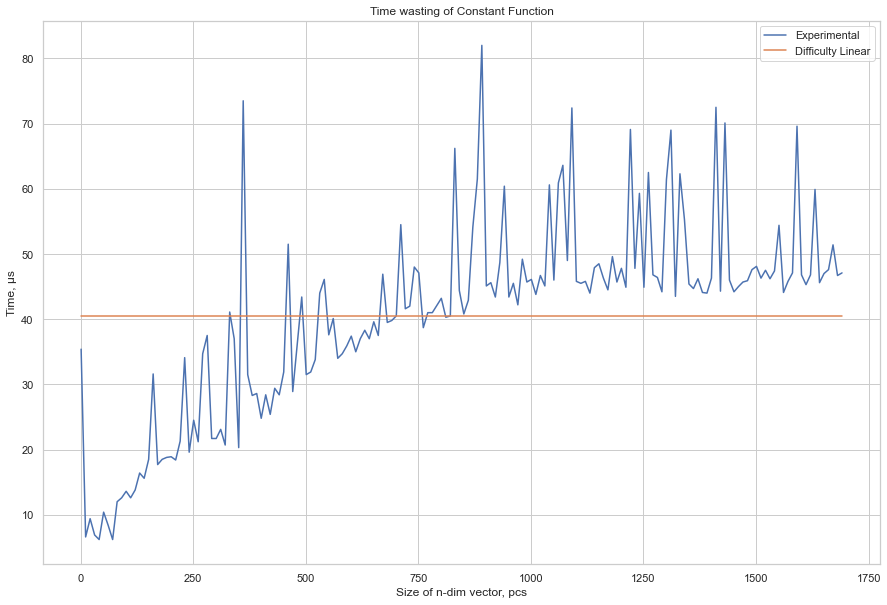

In [507]:
#Graphs plotting
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Constant_function*10e6, label="Experimental")
popt, _ = curve_fit(const_est, graph.n, graph.Constant_function*10e6)
plt.plot(graph.n, const_est(graph.n, *popt), label="Difficulty O(n)")
plt.title('Time wasting of Constant Function')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, μs')
plt.legend()
plt.savefig('./Pictures/task1_Cons.png', bbox_inches='tight')
plt.show()

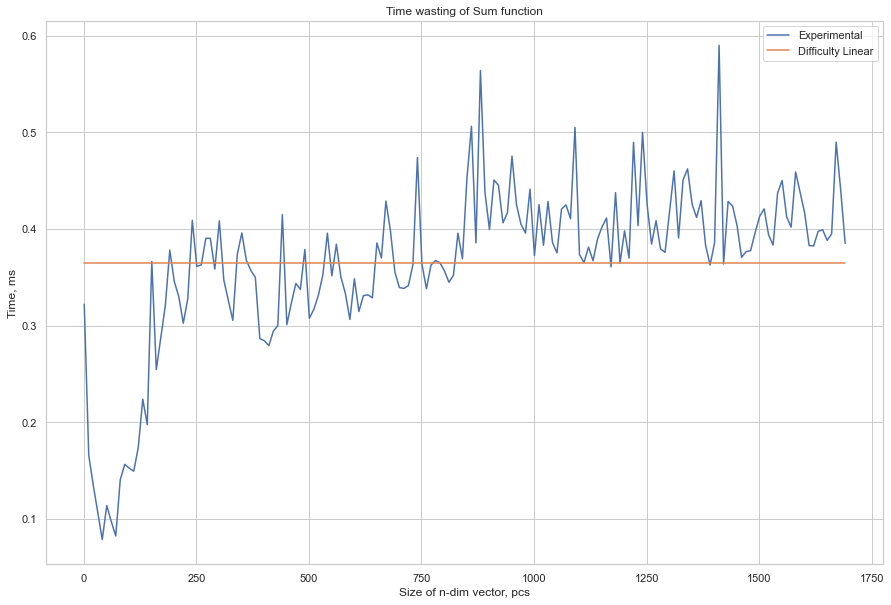

In [508]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Sum_elements*10e3,  label="Experimental")
popt, _ = curve_fit(const_est, graph.n, graph.Sum_elements*10e3)
plt.plot(graph.n, const_est(graph.n, *popt), label="Difficulty O(n)")
plt.title('Time wasting of Sum function')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, ms')
plt.legend()
plt.savefig('./Pictures/task1_Sum', bbox_inches='tight')
plt.show()


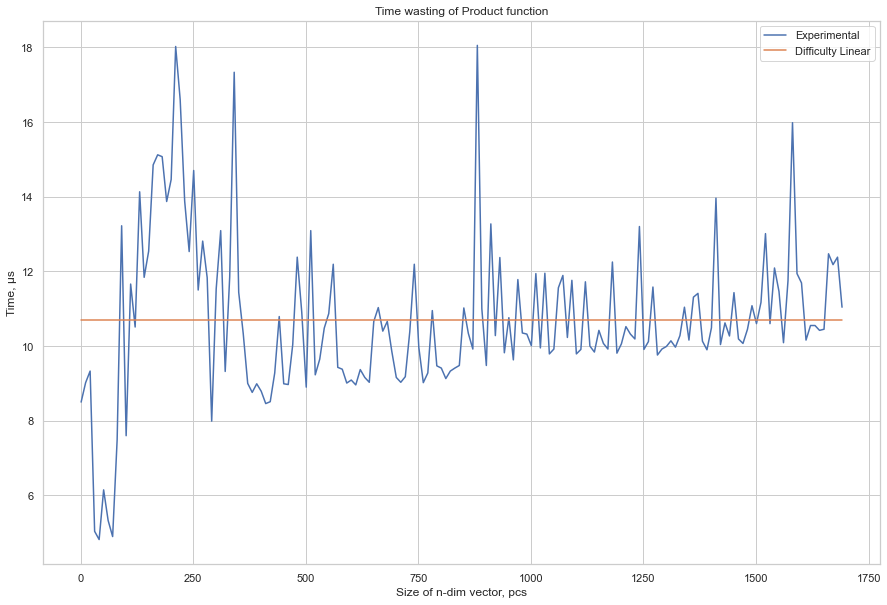

In [509]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Product_elements*1e6,  label="Experimental")
popt, _ = curve_fit(const_est, graph.n, graph.Product_elements*1e6)
plt.plot(graph.n, const_est(graph.n, *popt), label="Difficulty O(n)")
plt.title('Time wasting of Product function')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, μs')
plt.legend()
plt.savefig('./Pictures/task1_Prod', bbox_inches='tight')
plt.show()

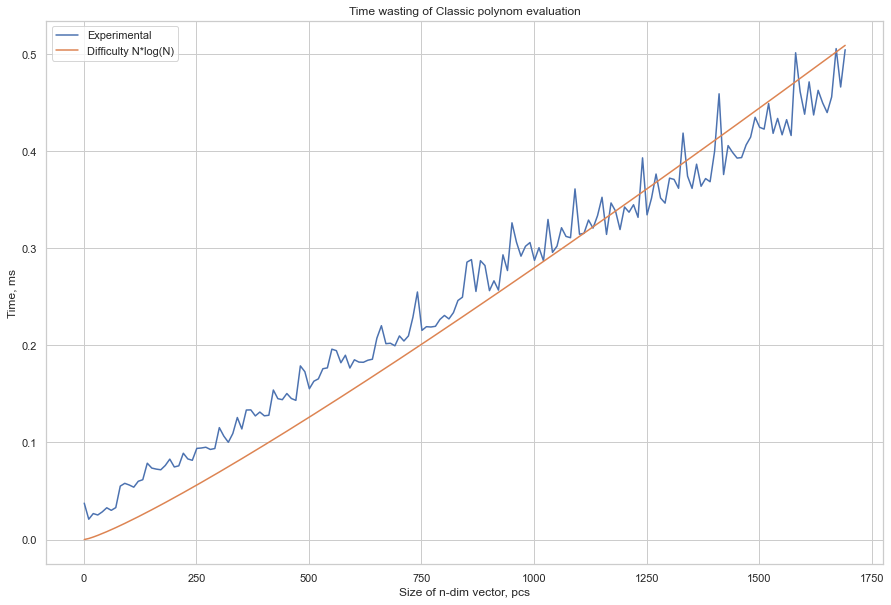

In [510]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Classic_polynom*1e3,  label="Experimental")
popt, _ = curve_fit(nlogn_est, graph.n, graph.Classic_polynom*1e3)
plt.plot(graph.n, nlogn_est(graph.n, *popt), label="Difficulty N*log(N)")
plt.title('Time wasting of Classic polynom evaluation')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, ms')
plt.legend()
plt.savefig('./Pictures/task1_Classic', bbox_inches='tight')
plt.show()

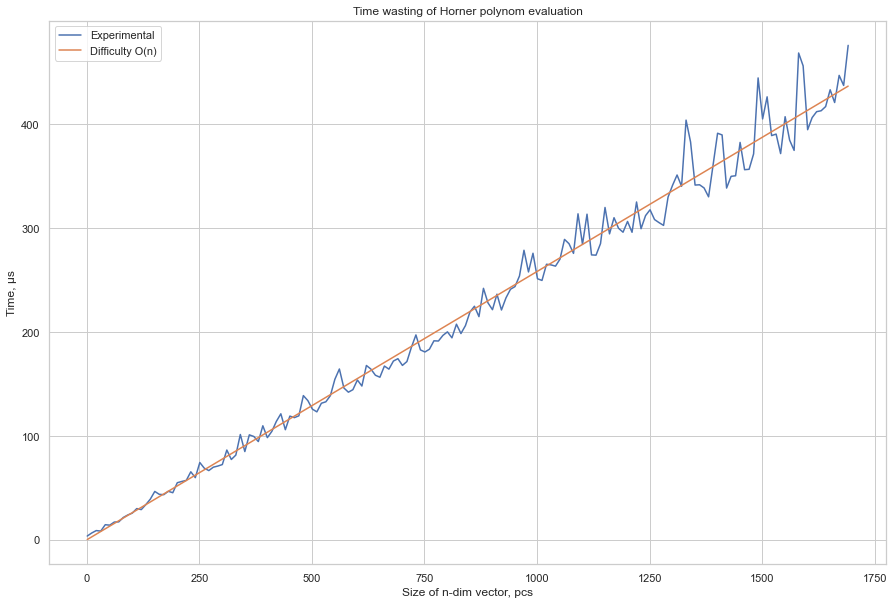

In [511]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Horner_polynom*1e6, label="Experimental")
popt, _ = curve_fit(linear_est, graph.n, graph.Horner_polynom*1e6)
plt.plot(graph.n, linear_est(graph.n, *popt), label="Difficulty O(n)")
plt.title('Time wasting of Horner polynom evaluation')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, μs')
plt.legend()
plt.savefig('./Pictures/task1_Horner', bbox_inches='tight')
plt.show()

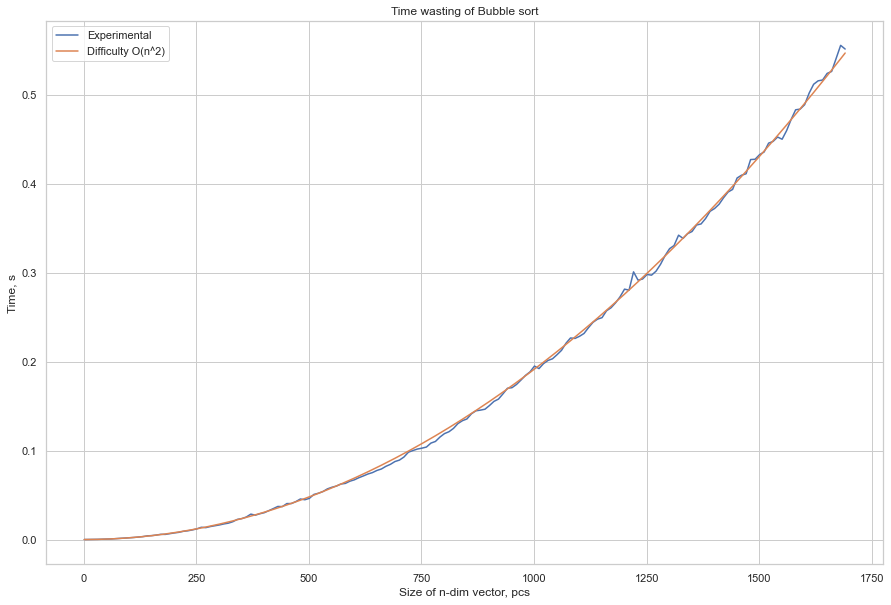

In [512]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Bubble_sort, label="Experimental")
popt, _ = curve_fit(quad_est, graph.n, graph.Bubble_sort)
plt.plot(graph.n, quad_est(graph.n, *popt), label="Difficulty O(n^2)")
plt.title('Time wasting of Bubble sort')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, s')
plt.legend()
plt.savefig('./Pictures/task1_bubble', bbox_inches='tight')
plt.show()

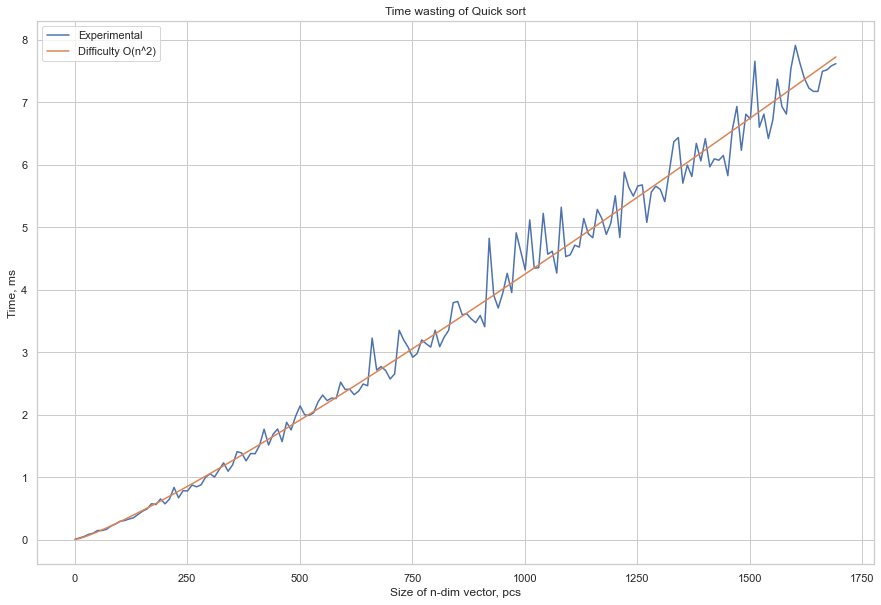

In [513]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Quick_sort*1e3, label="Experimental")
popt, _ = curve_fit(nlogn_est, graph.n, graph.Quick_sort*1e3)
plt.plot(graph.n, nlogn_est(graph.n, *popt), label="Difficulty O(n^2)")
plt.title('Time wasting of Quick sort')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, ms')
plt.legend()
plt.savefig('./Pictures/task1_QuickSort', bbox_inches='tight')
plt.show()

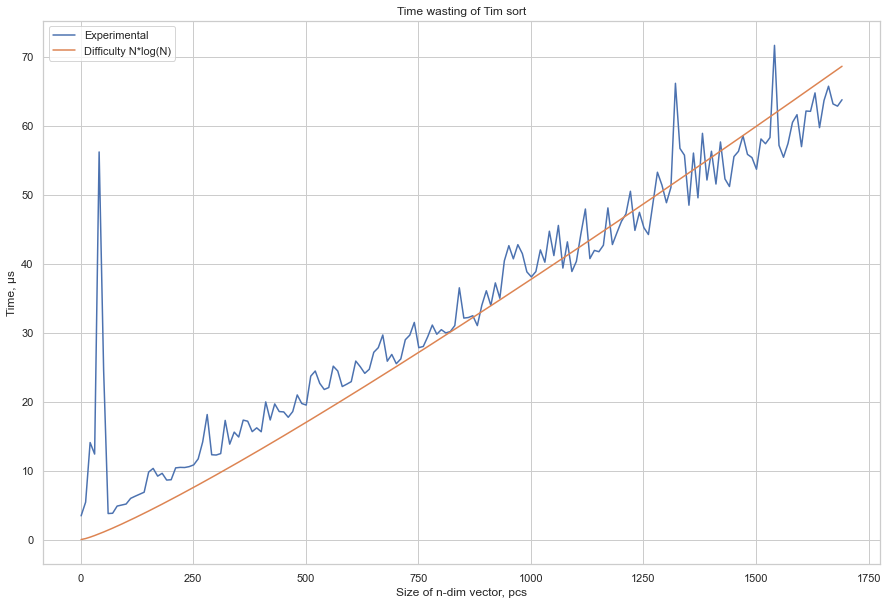

In [514]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Tim_sort*1e6, label="Experimental")
popt, _ = curve_fit(nlogn_est, graph.n, graph.Tim_sort*1e6)
plt.plot(graph.n, nlogn_est(graph.n, *popt), label="Difficulty N*log(N)")
plt.title('Time wasting of Tim sort')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, μs')
plt.legend()
plt.savefig('./Pictures/task1_Tims', bbox_inches='tight')
plt.show()

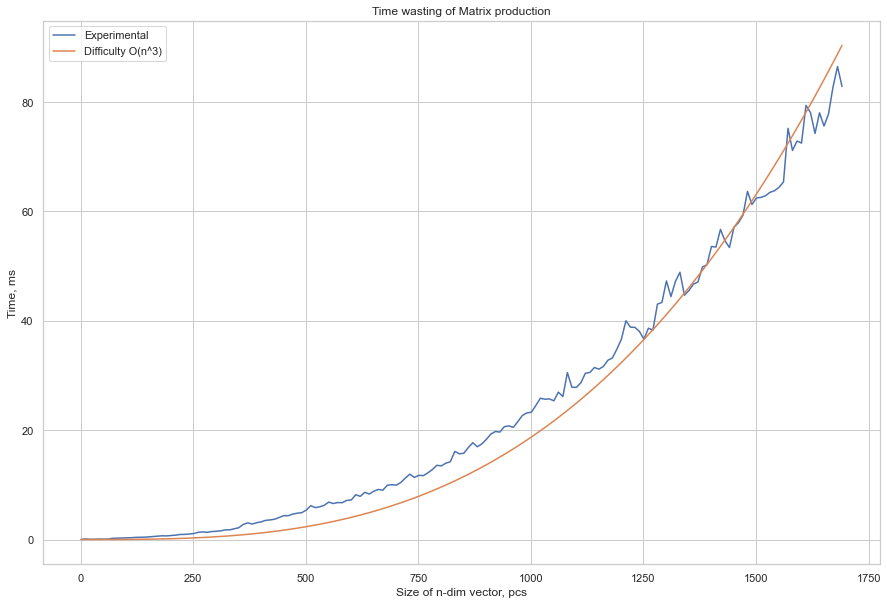

In [516]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Matrix_product*1e3, label="Experimental")
popt, _ = curve_fit(cubic_est, graph.n, graph.Matrix_product*1e3)
plt.plot(graph.n, cubic_est(graph.n, *popt), label="Difficulty O(n^3)")
plt.title('Time wasting of Matrix production')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, ms')
plt.legend()
plt.savefig('./Pictures/task1_Matrix', bbox_inches='tight')
plt.show()